In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from xgboost import plot_importance
import sklearn 
from sklearn.preprocessing import StandardScaler
# from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
import time

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
import plotly.io as pio
pio.renderers.default='notebook'

In [8]:
# df = pd.read_csv('diabetes-dataset.csv')
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df['Outcome']= df['Outcome'].astype("category")
df['Pregnancies'] = df['Pregnancies'] .astype("category")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    category
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(2), float64(2), int64(5)
memory usage: 44.4 KB


In [11]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


# 1.0 Data Exploration

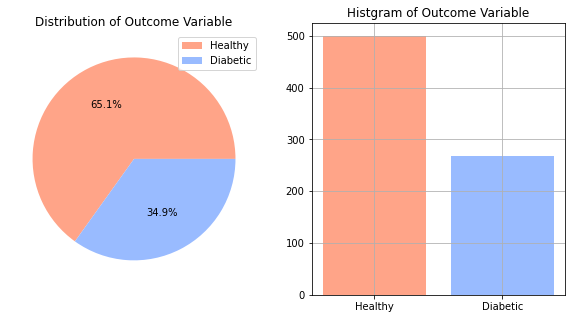

In [12]:
bar_x = ['Healthy','Diabetic']
bar_height = df['Outcome'].value_counts().values

plt.figure(figsize=(10,5))

# pie chart 
plt.subplot(1, 2, 1)
plt.pie(df['Outcome'].value_counts(),colors=['#FFA488','#99BBFF'],autopct='%1.1f%%')
plt.legend(['Healthy','Diabetic'],loc='best')
plt.title('Distribution of Outcome Variable')

# bar chart
plt.subplot(1, 2, 2)
plt.bar(x= bar_x,height= bar_height,
        color= ['#FFA488','#99BBFF'])
plt.title('Histgram of Outcome Variable')
plt.grid()

plt.show()

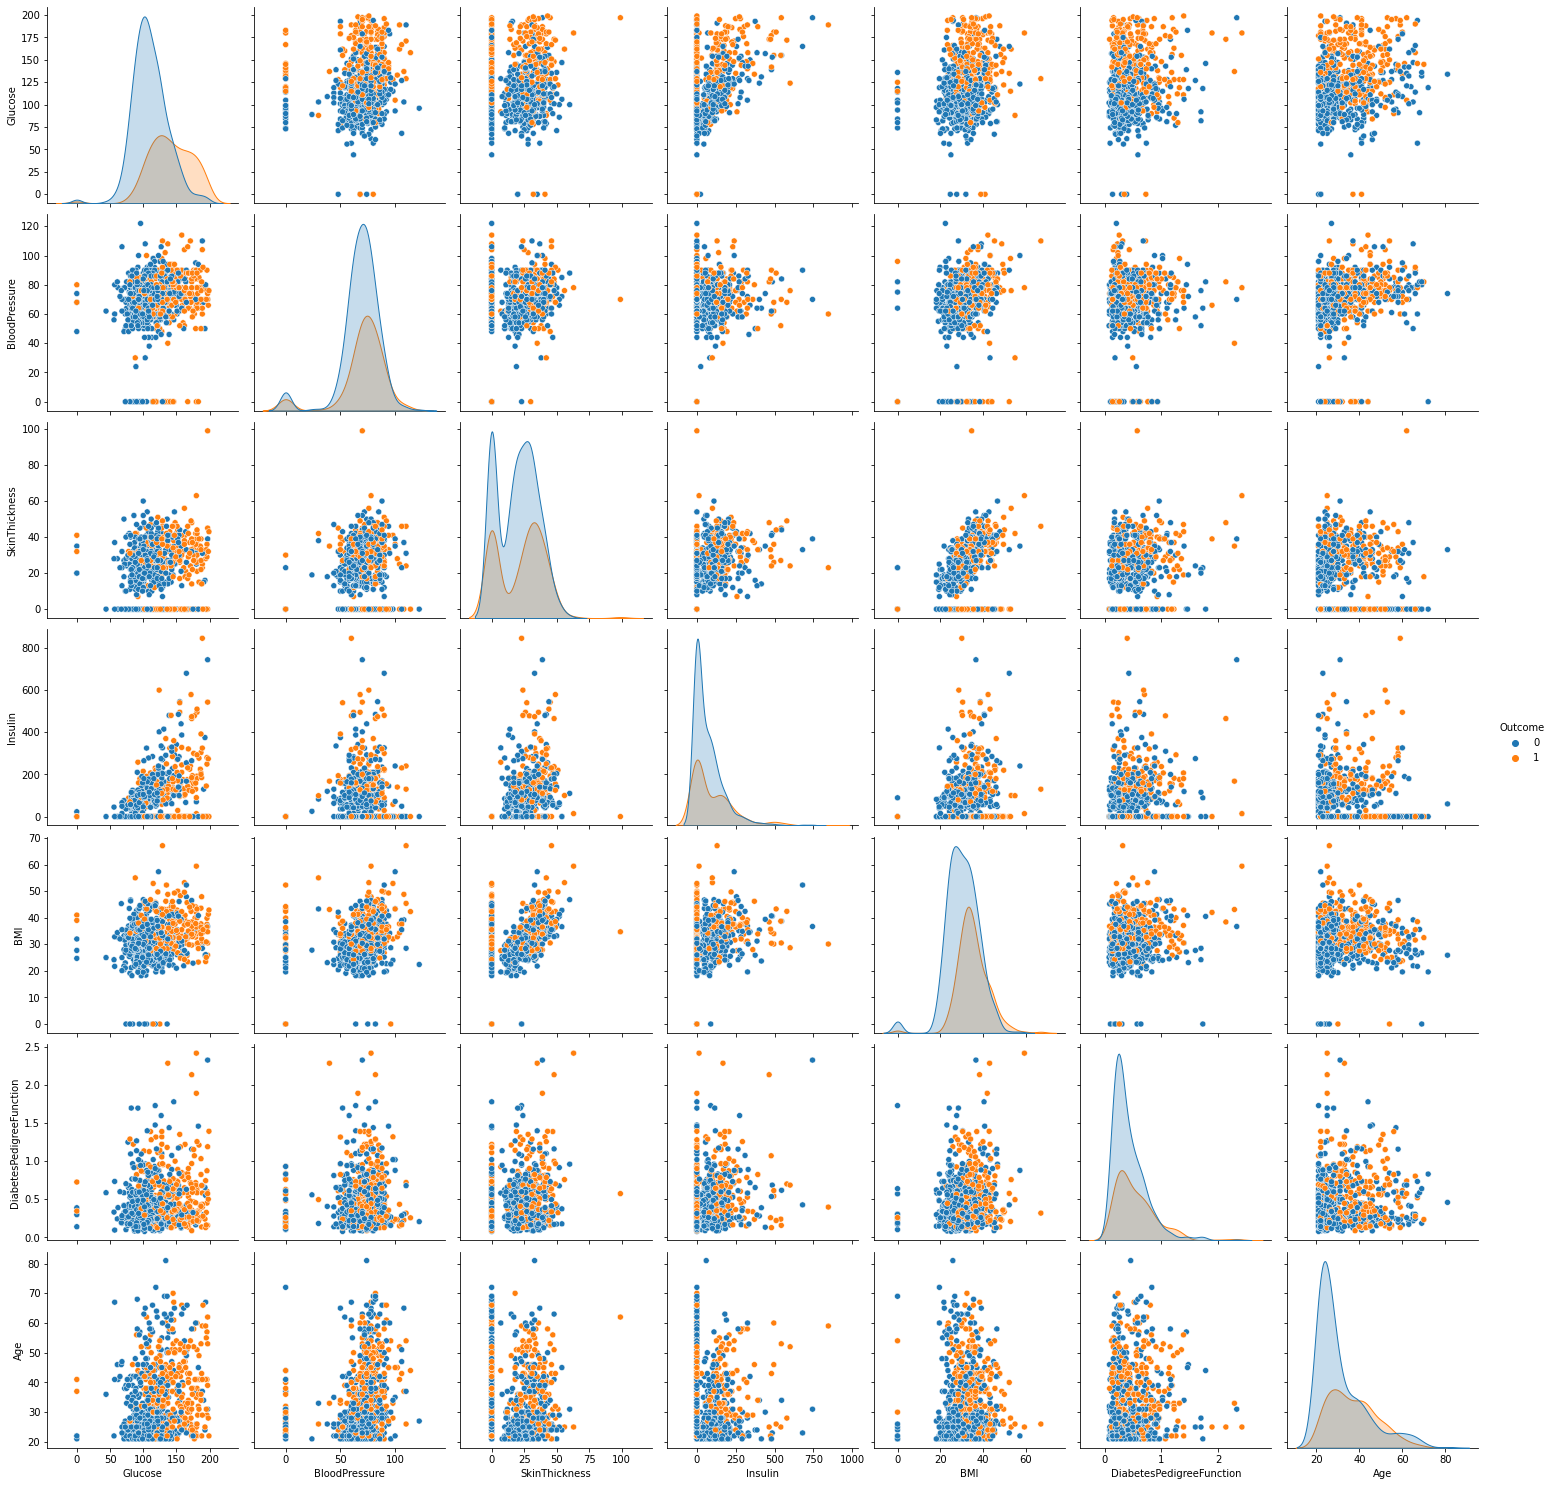

In [13]:
sns.pairplot(df, hue="Outcome", size=3, diag_kind="kde")

## Glucose
   

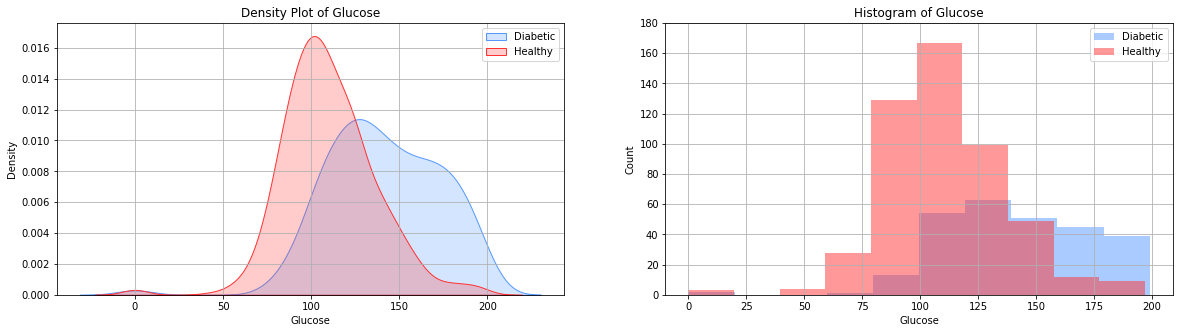

In [14]:
plt.figure(figsize=(20,5))

# density plot
plt.subplot(1, 2, 1)
# KDE plot of diabetes 
sns.kdeplot(df.loc[df['Outcome'] != 0, 'Glucose'], label = 'target == 0',color='#5599FF',fill=True)

# KDE plot of healthy 
sns.kdeplot(df.loc[df['Outcome'] == 0, 'Glucose'], label = 'target == 1',color='#FF3333',fill=True)

# Labeling of plot
plt.xlabel('Glucose')
plt.ylabel('Density')
plt.legend(['Diabetic','Healthy'],loc='upper right')
plt.title('Density Plot of Glucose')
plt.grid()

# histgram plot
plt.subplot(1, 2, 2)
plt.hist(df.loc[df['Outcome'] != 0, 'Glucose'].reset_index(drop=True), alpha=0.5, label="Diabetic",color='#5599FF')
plt.hist(df.loc[df['Outcome'] == 0, 'Glucose'].reset_index(drop=True), alpha=0.5, label="Healthy",color='#FF3333')
plt.legend()
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.yticks(np.arange(0, 200, 20))
plt.title('Histogram of Glucose')
plt.grid()


# plt.suptitle("Glucose")
plt.show()

##  BloodPressure

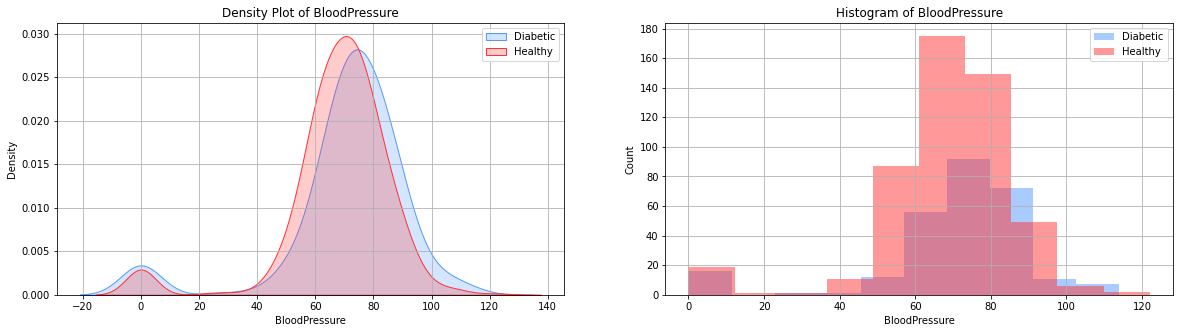

In [15]:
plt.figure(figsize=(20,5))

# density plot
plt.subplot(1, 2, 1)
# KDE plot of diabetes 
sns.kdeplot(df.loc[df['Outcome'] != 0, 'BloodPressure'], label = 'target == 0',color='#5599FF',fill=True)

# KDE plot of healthy 
sns.kdeplot(df.loc[df['Outcome'] == 0, 'BloodPressure'], label = 'target == 1',color='#FF3333',fill=True)

# Labeling of plot
plt.xlabel('BloodPressure')
plt.ylabel('Density')
plt.legend(['Diabetic','Healthy'],loc='upper right')
plt.title('Density Plot of BloodPressure')
plt.grid()

# histgram plot
plt.subplot(1, 2, 2)
plt.hist(df.loc[df['Outcome'] != 0, 'BloodPressure'].reset_index(drop=True), alpha=0.5, label="Diabetic",color='#5599FF')
plt.hist(df.loc[df['Outcome'] == 0, 'BloodPressure'].reset_index(drop=True), alpha=0.5, label="Healthy",color='#FF3333')
plt.legend()
plt.xlabel('BloodPressure')
plt.ylabel('Count')
plt.yticks(np.arange(0, 200, 20))
plt.title('Histogram of BloodPressure')
plt.grid()


# plt.suptitle("Glucose")
plt.show()

## SkinThickness	

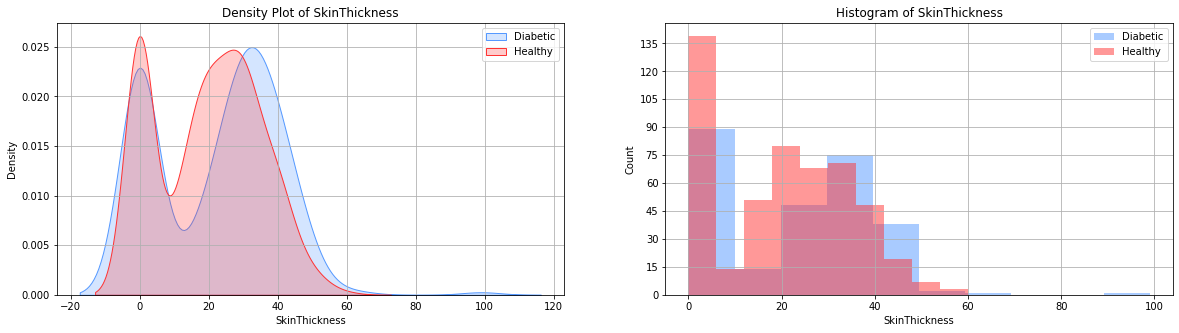

In [16]:
plt.figure(figsize=(20,5))

# density plot
plt.subplot(1, 2, 1)
# KDE plot of diabetes 
sns.kdeplot(df.loc[df['Outcome'] != 0, 'SkinThickness'], label = 'target == 0',color='#5599FF',fill=True)

# KDE plot of healthy 
sns.kdeplot(df.loc[df['Outcome'] == 0, 'SkinThickness'], label = 'target == 1',color='#FF3333',fill=True)

# Labeling of plot
plt.xlabel('SkinThickness')
plt.ylabel('Density')
plt.legend(['Diabetic','Healthy'],loc='upper right')
plt.title('Density Plot of SkinThickness')
plt.grid()

# histgram plot
plt.subplot(1, 2, 2)
plt.hist(df.loc[df['Outcome'] != 0, 'SkinThickness'].reset_index(drop=True), alpha=0.5, label="Diabetic",color='#5599FF')
plt.hist(df.loc[df['Outcome'] == 0, 'SkinThickness'].reset_index(drop=True), alpha=0.5, label="Healthy",color='#FF3333')
plt.legend()
plt.xlabel('SkinThickness')
plt.ylabel('Count')
plt.yticks(np.arange(0, 150, 15))
plt.title('Histogram of SkinThickness')
plt.grid()


# plt.suptitle("Glucose")
plt.show()

## Insulin

    

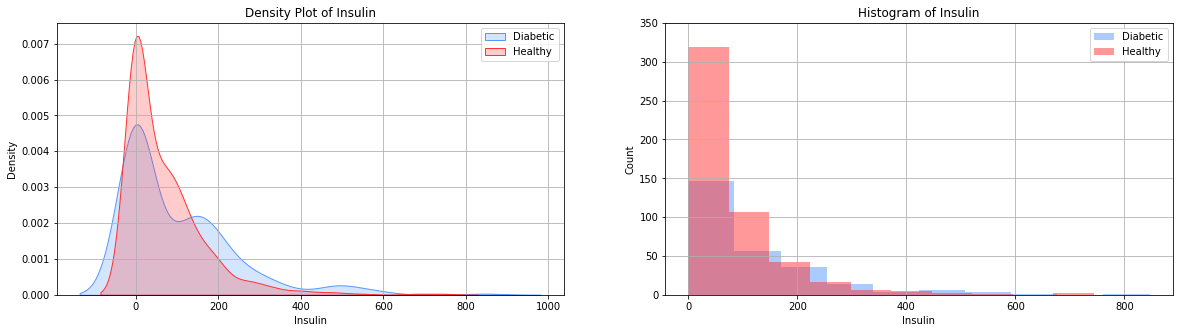

In [17]:
plt.figure(figsize=(20,5))

# density plot
plt.subplot(1, 2, 1)
# KDE plot of diabetes 
sns.kdeplot(df.loc[df['Outcome'] != 0, 'Insulin'], label = 'target == 0',color='#5599FF',fill=True)

# KDE plot of healthy 
sns.kdeplot(df.loc[df['Outcome'] == 0, 'Insulin'], label = 'target == 1',color='#FF3333',fill=True)

# Labeling of plot
plt.xlabel('Insulin')
plt.ylabel('Density')
plt.legend(['Diabetic','Healthy'],loc='upper right')
plt.title('Density Plot of Insulin')
plt.grid()

# histgram plot
plt.subplot(1, 2, 2)
plt.hist(df.loc[df['Outcome'] != 0, 'Insulin'].reset_index(drop=True), alpha=0.5, label="Diabetic",color='#5599FF')
plt.hist(df.loc[df['Outcome'] == 0, 'Insulin'].reset_index(drop=True), alpha=0.5, label="Healthy",color='#FF3333')
plt.legend()
plt.xlabel('Insulin')
plt.ylabel('Count')
plt.yticks(np.arange(0, 400, 50))
plt.title('Histogram of Insulin')
plt.grid()


# plt.suptitle("Glucose")
plt.show()

## BMI

     

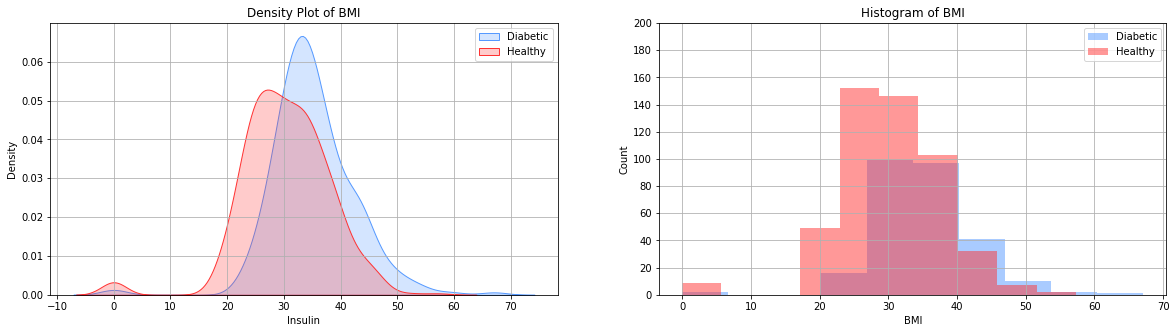

In [18]:
plt.figure(figsize=(20,5))

# density plot
plt.subplot(1, 2, 1)
# KDE plot of diabetes 
sns.kdeplot(df.loc[df['Outcome'] != 0, 'BMI'], label = 'target == 0',color='#5599FF',fill=True)

# KDE plot of healthy 
sns.kdeplot(df.loc[df['Outcome'] == 0, 'BMI'], label = 'target == 1',color='#FF3333',fill=True)

# Labeling of plot
plt.xlabel('Insulin')
plt.ylabel('Density')
plt.legend(['Diabetic','Healthy'],loc='upper right')
plt.title('Density Plot of BMI')
plt.grid()

# histgram plot
plt.subplot(1, 2, 2)
plt.hist(df.loc[df['Outcome'] != 0, 'BMI'].reset_index(drop=True), alpha=0.5, label="Diabetic",color='#5599FF')
plt.hist(df.loc[df['Outcome'] == 0, 'BMI'].reset_index(drop=True), alpha=0.5, label="Healthy",color='#FF3333')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Count')
plt.yticks(np.arange(0, 220, 20))
plt.title('Histogram of BMI')
plt.grid()


# plt.suptitle("Glucose")
plt.show()

## Age

    

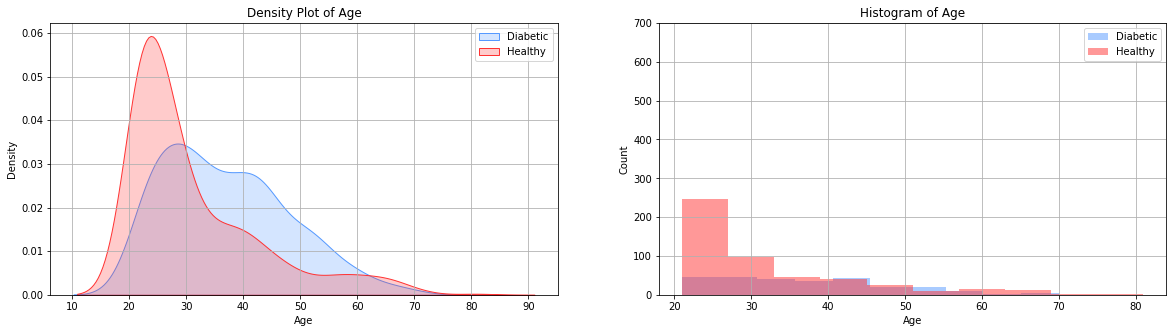

In [19]:
plt.figure(figsize=(20,5))

# density plot
plt.subplot(1, 2, 1)
# KDE plot of diabetes 
sns.kdeplot(df.loc[df['Outcome'] != 0, 'Age'], label = 'target == 0',color='#5599FF',fill=True)

# KDE plot of healthy 
sns.kdeplot(df.loc[df['Outcome'] == 0, 'Age'], label = 'target == 1',color='#FF3333',fill=True)

# Labeling of plot
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(['Diabetic','Healthy'],loc='upper right')
plt.title('Density Plot of Age')
plt.grid()

# histgram plot
plt.subplot(1, 2, 2)
plt.hist(df.loc[df['Outcome'] != 0, 'Age'].reset_index(drop=True), alpha=0.5, label="Diabetic",color='#5599FF')
plt.hist(df.loc[df['Outcome'] == 0, 'Age'].reset_index(drop=True), alpha=0.5, label="Healthy",color='#FF3333')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.yticks(np.arange(0, 800, 100))
plt.title('Histogram of Age')
plt.grid()


# plt.suptitle("Glucose")
plt.show()

## DiabetesPedigreeFunction

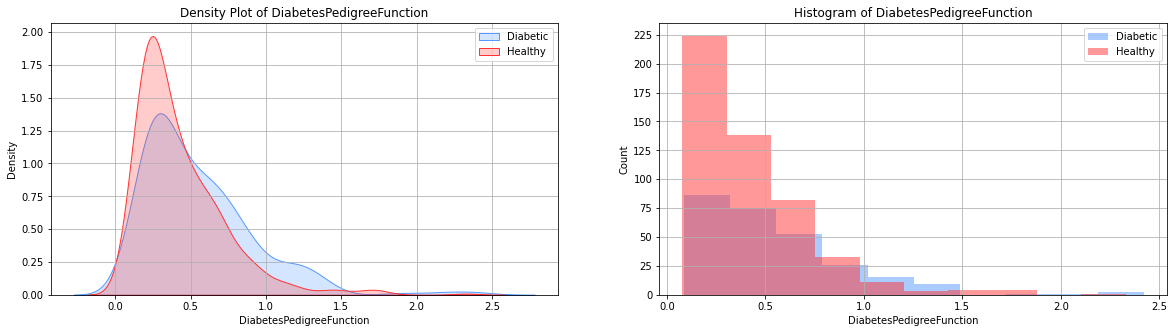

In [20]:
plt.figure(figsize=(20,5))

# density plot
plt.subplot(1, 2, 1)
# KDE plot of diabetes 
sns.kdeplot(df.loc[df['Outcome'] != 0, 'DiabetesPedigreeFunction'], label = 'target == 0',color='#5599FF',fill=True)

# KDE plot of healthy 
sns.kdeplot(df.loc[df['Outcome'] == 0, 'DiabetesPedigreeFunction'], label = 'target == 1',color='#FF3333',fill=True)

# Labeling of plot
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Density')
plt.legend(['Diabetic','Healthy'],loc='upper right')
plt.title('Density Plot of DiabetesPedigreeFunction')
plt.grid()

# histgram plot
plt.subplot(1, 2, 2)
plt.hist(df.loc[df['Outcome'] != 0, 'DiabetesPedigreeFunction'].reset_index(drop=True), alpha=0.5, label="Diabetic",color='#5599FF')
plt.hist(df.loc[df['Outcome'] == 0, 'DiabetesPedigreeFunction'].reset_index(drop=True), alpha=0.5, label="Healthy",color='#FF3333')
plt.legend()
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Count')
plt.yticks(np.arange(0, 250, 25))
plt.title('Histogram of DiabetesPedigreeFunction')
plt.grid()


# plt.suptitle("Glucose")
plt.show()

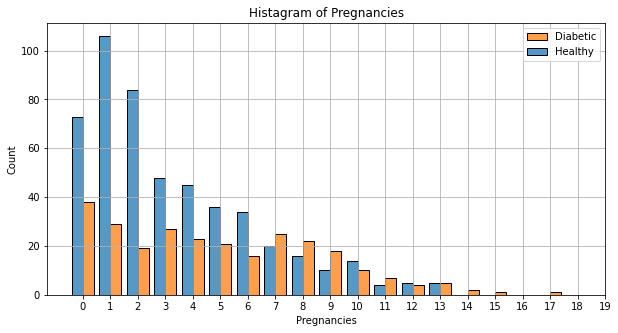

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(data= df, x="Pregnancies", hue="Outcome", multiple="dodge", shrink=.8)
plt.legend(['Diabetic','Healthy'],loc='upper right')
plt.title('Histagram of Pregnancies')
plt.xticks(np.arange(0, 20, 1))
plt.grid()

## 1.1 Select Features by Random Forest 

      by the bar plot, we should keep:
      1. Feature_1:Glucose
      2. Feature_5:BMI  
      3. Feature_6:DiabetesPedigreeFunction
      4. Feature_7:Age

In [22]:
# df = pd.read_csv('diabetes.csv')
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']
lbl = preprocessing.LabelEncoder()
df['Pregnancies'] = pd.to_numeric(df['Pregnancies'])

In [23]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

In [24]:
forest_importances= forest_importances.sort_values(ascending=False)
forest_importances

feature 1    0.242098
feature 5    0.172574
feature 7    0.135220
feature 6    0.128324
feature 2    0.092903
feature 0    0.086774
feature 3    0.073109
feature 4    0.068999
dtype: float64

In [25]:
forest_importances[0]

0.24209794428894787

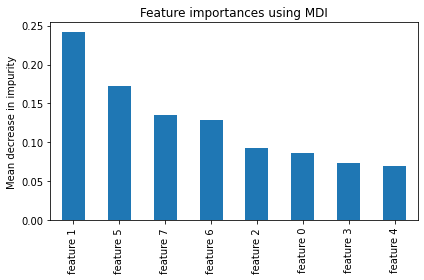

In [26]:
fig, ax = plt.subplots()
forest_importances.plot.bar() #yerr=std, ax=ax
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## 1.2 Data Preparation

In [27]:
df = df.iloc[:,[1,5,7,6,2,0,3,4,8]]
df.head()

,Glucose,BMI,Age,DiabetesPedigreeFunction,BloodPressure,Pregnancies,SkinThickness,Insulin,Outcome
0,148,33.6,50,0.627,72,6,35,0,1
1,85,26.6,31,0.351,66,1,29,0,0
2,183,23.3,32,0.672,64,8,0,0,1
3,89,28.1,21,0.167,66,1,23,94,0
4,137,43.1,33,2.288,40,0,35,168,1


### 1.2.1 Test - train split

In [28]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 1.2.2 Standardization

In [29]:
#Standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
var = scaler.var_
mean = scaler.mean_
X_train_arry = scaler.transform(X_train)
X_test_arry = scaler.transform(X_test)

#Insert the first column of all 1s in the training and test set
one_train = np.ones((np.shape(X_train_arry)[0],1))
one_test = np.ones((np.shape(X_test_arry)[0],1))
X_train_std_1 = np.hstack((one_train, X_train_arry))
X_test_std_1 = np.hstack((one_test, X_test_arry))

In [30]:
X_train= pd.DataFrame(X_train_arry, columns = df.columns[:8])
X_test= pd.DataFrame(X_test_arry, columns = df.columns[:8])

# 2.0 SkLearn Approach

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

In [32]:
%pip install mlxtend --upgrade
#import mlxtend
from mlxtend.evaluate import bias_variance_decomp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 10.0 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


## 2.1 Bias - Variance Tradeoff

In [33]:
#Output var-bias tradeoff table
out = pd.DataFrame(columns = ['MSE', 'Bias^2', 'Variance'])

for i in range(8):
  grid = dict()
  grid['solver'] = ['saga', 'liblinear'] 
  grid['C'] = np.linspace(0, 5, 101)
  log = LogisticRegression(penalty='l1')
  logreg_cv = GridSearchCV(log, grid, cv=10)
  logreg_cv.fit(X_train.iloc[:,:i+1],y_train)
  best_c  = logreg_cv.best_params_.get("C")
  best_solver = logreg_cv.best_params_.get("solver")
  log_best = LogisticRegression(penalty='l1', solver = best_solver, C=best_c)
  log_best.fit(X_train.iloc[:,:i+1],y_train)

  mse, bias, variance = bias_variance_decomp(
    log_best, 
    X_train.iloc[:,:i+1].to_numpy(), y_train.to_numpy(),
    X_test.iloc[:,:i+1].to_numpy(), y_test.to_numpy(), 
    loss = 'mse')
    
  out.loc[i, 'Bias^2'] = bias
  out.loc[i, 'Variance'] = variance
  out.loc[i, 'MSE'] = mse
out.index = np.arange(1,len(out)+1)
out

,MSE,Bias^2,Variance
1,0.263268,0.25003,0.013239
2,0.23645,0.221082,0.015369
3,0.244848,0.227155,0.017694
4,0.235541,0.215126,0.020416
5,0.233593,0.210962,0.022631
6,0.234675,0.214584,0.020092
7,0.234264,0.212983,0.021281
8,0.235087,0.215589,0.019497


In [34]:
#Output var-bias tradeoff table
## Take around 9 mins to run this cell in google colab
out = pd.DataFrame(columns = ['MSE_cv5', 'Bias^2_cv5', 'Variance_cv5',
                              'MSE_cv10', 'Bias^2_cv10', 'Variance_cv10',
                              'MSE_cv15', 'Bias^2_cv15', 'Variance_cv15',
                              'MSE_cv20', 'Bias^2_cv20', 'Variance_cv20'],
                              index=[1, 2, 3,4,5,6,7,8])
cv=[5,10,15,20]
col_idx = [0,3,6,9]
for j in range(len(cv)):

  for i in range(8):
    grid = dict()
    grid['solver'] = ['saga', 'liblinear'] 
    grid['C'] = np.linspace(0, 5, 101)
    log = LogisticRegression(penalty='l1')
    logreg_cv = GridSearchCV(log, grid, cv=cv[j])
    logreg_cv.fit(X_train.iloc[:,:i+1],y_train)
    best_c  = logreg_cv.best_params_.get("C")
    best_solver = logreg_cv.best_params_.get("solver")
    log_best = LogisticRegression(penalty='l1', solver = best_solver, C=best_c)
    log_best.fit(X_train.iloc[:,:i+1],y_train)

    mse, bias, variance = bias_variance_decomp(
      log_best, 
      X_train.iloc[:,:i+1].to_numpy(), y_train.to_numpy(),
      X_test.iloc[:,:i+1].to_numpy(), y_test.to_numpy(), 
      loss = 'mse')
      
    out.iloc[i,col_idx[j] ] = mse
    out.iloc[i, col_idx[j]+1] = bias
    out.iloc[i, col_idx[j]+2] = variance
print(out)

    MSE_cv5 Bias^2_cv5 Variance_cv5  MSE_cv10 Bias^2_cv10 Variance_cv10  \
1  0.262771   0.249635     0.013135  0.263463    0.251915      0.011548   
2  0.239957   0.223076     0.016881  0.236667    0.221471      0.015195   
3  0.243788   0.226475     0.017313  0.245087     0.22782      0.017267   
4  0.236797   0.215822     0.020974  0.237338     0.21652      0.020817   
5  0.235303   0.213018     0.022285  0.233874    0.212048      0.021826   
6   0.23329   0.207351     0.025939  0.233961    0.213494      0.020467   
7   0.23487    0.20914     0.025731  0.234048    0.213908       0.02014   
8   0.23184   0.206156     0.025684  0.232338    0.211385      0.020953   

   MSE_cv15 Bias^2_cv15 Variance_cv15  MSE_cv20 Bias^2_cv20 Variance_cv20  
1  0.263139    0.249493      0.013645  0.262641     0.24897       0.01367  
2  0.238528    0.223297      0.015231  0.238593    0.222361      0.016232  
3  0.246234    0.228162      0.018072  0.244264    0.228401      0.015863  
4  0.237316    0.215

In [35]:
# Check relation between number of folds for CV and number of features in the model
out.iloc[:,[0,3,6,9]]

,MSE_cv5,MSE_cv10,MSE_cv15,MSE_cv20
1,0.262771,0.263463,0.263139,0.262641
2,0.239957,0.236667,0.238528,0.238593
3,0.243788,0.245087,0.246234,0.244264
4,0.236797,0.237338,0.237316,0.23658
5,0.235303,0.233874,0.233766,0.233355
6,0.23329,0.233961,0.241861,0.22961
7,0.23487,0.234048,0.24197,0.23197
8,0.23184,0.232338,0.239524,0.232511


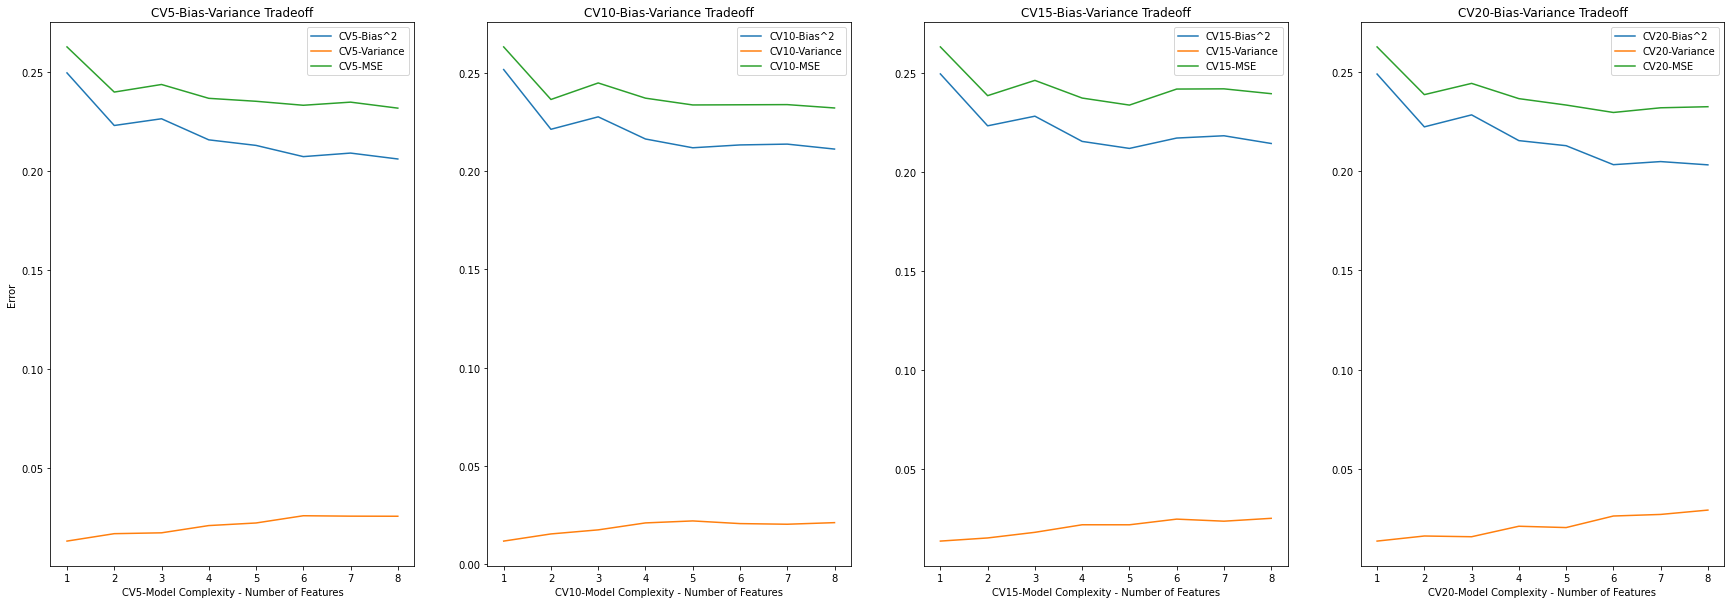

In [36]:
#plot Bias-var 

fig,axes = plt.subplots(1,4,figsize = (30,10))

axes[0].plot(out.index, out['Bias^2_cv5'], label = 'CV5-Bias^2')
axes[0].plot(out.index, out['Variance_cv5'], label = 'CV5-Variance')
axes[0].plot(out.index, out['MSE_cv5'], label = 'CV5-MSE')

axes[1].plot(out.index, out['Bias^2_cv10'], label = 'CV10-Bias^2')
axes[1].plot(out.index, out['Variance_cv10'], label = 'CV10-Variance')
axes[1].plot(out.index, out['MSE_cv10'], label = 'CV10-MSE')

axes[2].plot(out.index, out['Bias^2_cv15'], label = 'CV15-Bias^2')
axes[2].plot(out.index, out['Variance_cv15'], label = 'CV15-Variance')
axes[2].plot(out.index, out['MSE_cv15'], label = 'CV15-MSE')

axes[3].plot(out.index, out['Bias^2_cv20'], label = 'CV20-Bias^2')
axes[3].plot(out.index, out['Variance_cv20'], label = 'CV20-Variance')
axes[3].plot(out.index, out['MSE_cv20'], label = 'CV20-MSE')

#axes[i].set_ylim(0, 100)
axes[0].set_xlabel("CV5-Model Complexity - Number of Features")
axes[1].set_xlabel("CV10-Model Complexity - Number of Features")
axes[2].set_xlabel("CV15-Model Complexity - Number of Features")
axes[3].set_xlabel("CV20-Model Complexity - Number of Features")

axes[0].set_title("CV5-Bias-Variance Tradeoff")
axes[1].set_title("CV10-Bias-Variance Tradeoff")
axes[2].set_title("CV15-Bias-Variance Tradeoff")
axes[3].set_title("CV20-Bias-Variance Tradeoff")

axes[0].set_ylabel("Error")

axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[2].legend(loc='upper right')
axes[3].legend(loc='upper right')

## 2.2 Model with 4 features

In [37]:
#grid search for hyper-parameter C and solver
grid = dict()
grid['solver'] = ['saga', 'liblinear'] 
grid['C'] = np.linspace(0, 5, 101)
log = LogisticRegression(penalty='l1')
logreg_cv = GridSearchCV(log, grid, cv=10)
logreg_cv.fit(X_train.iloc[:,:5],y_train)

print("best parameters: ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

best parameters:  {'C': 0.15000000000000002, 'solver': 'saga'}
accuracy : 0.7746331236897275


In [38]:
# impletment model with best C and solver 
best_c  = logreg_cv.best_params_.get("C")
best_solver = logreg_cv.best_params_.get("solver")
log_best = LogisticRegression(penalty='l1', solver = best_solver, C=best_c)
log_best.fit(X_train.iloc[:,:5],y_train)
print("accuracy score in train dataset :",log_best.score(X_train.iloc[:,:5], y_train))
print("accuracy score in test dataset :",log_best.score(X_test.iloc[:,:5], y_test))

accuracy score in train dataset : 0.7783985102420856
accuracy score in test dataset : 0.7705627705627706


In [39]:
#confusion matrix
def create_cf(matrix):
  cf_matrix = matrix
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

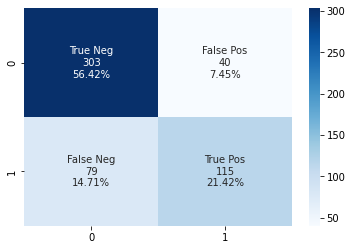

In [40]:
# Trainging CF Matrix
y_pre1 = log_best.predict(X_train.iloc[:,:5])
y_pre2 = log_best.predict(X_test.iloc[:,:5])
create_cf(confusion_matrix(y_train, y_pre1))

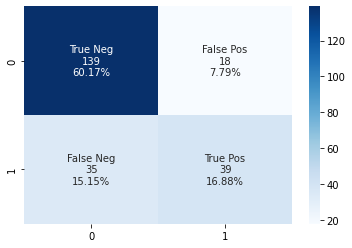

In [41]:
# Testing CF Matrix
create_cf(confusion_matrix(y_test, y_pre2))

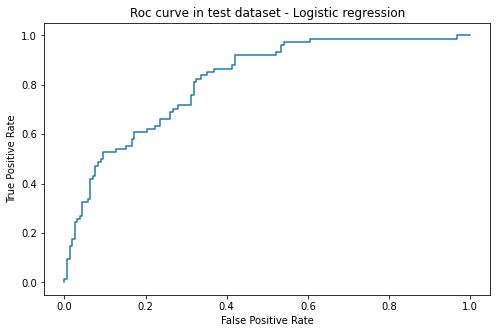

roc_auc_score : 0.8175245309003272


In [42]:
#ROC curve
y_pro2 = log_best.predict_proba(X_test.iloc[:,:5])[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pro2)
plt.figure(figsize=(8,5))
plt.plot(false_positive_rate, true_positive_rate)
plt.title('Roc curve in test dataset - Logistic regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("roc_auc_score :", roc_auc_score(y_test, y_pro2))

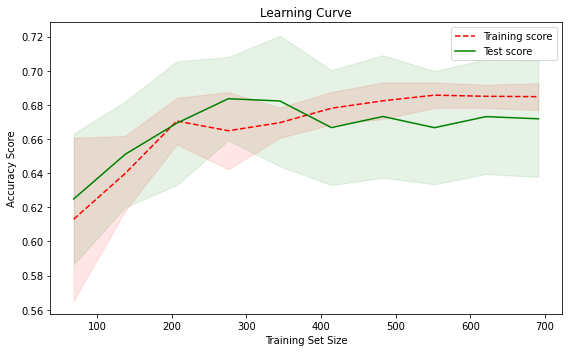

In [43]:
#learning curve
train_sizes, train_scores, test_scores = learning_curve(log_best, X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

tr1 = train_mean - train_std
tr2 = train_mean + train_std
te1 = test_mean - test_std
te2 = test_mean + test_std

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, '--', label="Training score", color="r")
plt.plot(train_sizes, test_mean, label="Test score", color="g")

plt.fill_between(train_sizes, tr1, tr2, color="r", alpha=0.1)
plt.fill_between(train_sizes, te1, te2, color="g", alpha=0.1)

plt.title("Learning Curve")
plt.xlabel("Training Set Size") 
plt.ylabel("Accuracy Score") 
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## 2.3 Model with 6 features

In [44]:
log2 = LogisticRegression(penalty='l1')
logreg_cv2 = GridSearchCV(log2, grid, cv=10)
logreg_cv2.fit(X_train.iloc[:,:7],y_train)

print("best parameters: ",logreg_cv2.best_params_)
print("accuracy :",logreg_cv2.best_score_)

best parameters:  {'C': 0.05, 'solver': 'saga'}
accuracy : 0.7709294199860237


In [45]:
# impletment model with best C and solver 
best_c2  = logreg_cv2.best_params_.get("C")
best_solver2 = logreg_cv2.best_params_.get("solver")
log_best2 = LogisticRegression(penalty='l1', solver = best_solver2, C=best_c2)
log_best2.fit(X_train.iloc[:,:7],y_train)
print("accuracy score in train dataset :",log_best2.score(X_train.iloc[:,:7], y_train))
print("accuracy score in test dataset :",log_best2.score(X_test.iloc[:,:7], y_test))

accuracy score in train dataset : 0.770949720670391
accuracy score in test dataset : 0.7705627705627706


# 3.0 Direct Approach by Solving an Optimization Problem (4 features)

In [46]:
from sklearn.metrics import accuracy_score
from scipy.optimize import minimize

X = X_train_std_1[:,:5]
y = y_train.astype('category').cat.codes.values

## 3.1 Form the Objective Fucntion

In [47]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1/(1 + np.exp(-x))

def cost_function(x):
    theta = np.array([[x[0], x[1], x[2], x[3], x[4]]])
    
    # Initialisation of useful values 
    m = np.size(y_train)
    hx = sigmoid(X @ theta.T)
    
    # Cost function
    J = -(1 / m) * np.sum(y * np.log(hx) + (1 - y) * np.log(1 - hx))
    
    # Add L1 regularization and Hyperparameter
    J = x[5] * J + np.sum(abs(theta))
    return J

## 3.2 Solving the Objective Fuction

In [48]:
x_0 = [0.001]*6
bnds = ((None, None), (None, None), (None, None), (None, None), (None, None), (0.001, 100))
sol = minimize(cost_function, x_0, bounds=bnds, method = 'Powell')

thetas = np.array([sol.x[0:5]])
opt_c = np.array([sol.x[-1]])
y_pred_test = X_test_std_1[:,:5] @ thetas.T > 0
y_pred_train = X_train_std_1[:,:5] @ thetas.T > 0
train_score = accuracy_score(y, y_pred_train)
test_score = accuracy_score(y_test, y_pred_test)
print('The training score is: %s'%round(train_score,2))
print('The testing score is: %s'%round(test_score,2))
print(sol)

The training score is: 0.73
The testing score is: 0.77
   direc: array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])
     fun: 0.3921994296328144
 message: 'Optimization terminated successfully.'
    nfev: 131
     nit: 1
  status: 0
 success: True
       x: array([-4.39727436e-06,  3.63312116e-06,  3.11091491e-06, -1.22322677e-06,
        3.87919660e-06,  1.05363359e-03])


## 3.3 Optimization Results

In [49]:
#check all opotimized parameters
print("Optimal thetas are:", thetas)
print("Optimal C is:",opt_c )

Optimal thetas are: [[-4.39727436e-06  3.63312116e-06  3.11091491e-06 -1.22322677e-06
   3.87919660e-06]]
Optimal C is: [0.00105363]


In [50]:
print("confusion matrix in train dataset :", confusion_matrix(y_train, y_pred_train))
print("------------------------------")
print("confusion matrix in test dataset :", confusion_matrix(y_test, y_pred_test))

confusion matrix in train dataset : [[306  37]
 [107  87]]
------------------------------
confusion matrix in test dataset : [[143  14]
 [ 40  34]]


In [51]:
def create_cf(matrix):
  cf_matrix = matrix
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

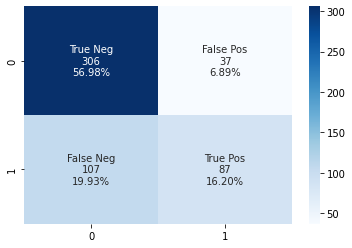

In [52]:
# Training CF Matrix
create_cf(confusion_matrix(y_train, y_pred_train))

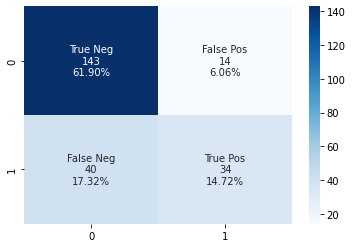

In [53]:
# Testing CF Matrix
create_cf(confusion_matrix(y_test, y_pred_test))